In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge, Rectangle, Polygon
from matplotlib.collections import PatchCollection

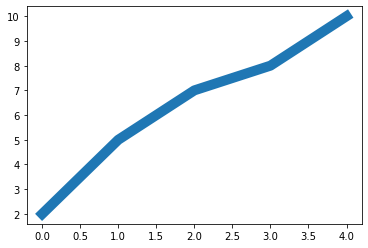

In [2]:
# 1) 直接在plot()函数中设置
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10); # 设置线的粗细参数为10

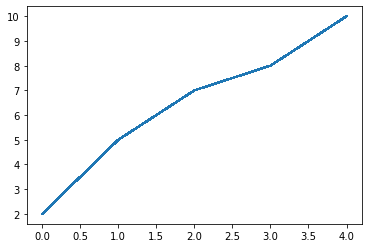

In [3]:
# 2) 通过获得线对象，对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-') # 这里等号坐标的line,是一个列表解包的操作，目的是获取plt.plot返回列表中的Line2D对象
line.set_antialiased(False); # 关闭抗锯齿功能

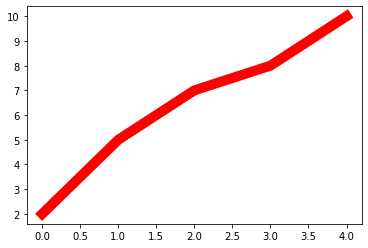

In [4]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10);



<Axes.ArtistList of 2 lines>


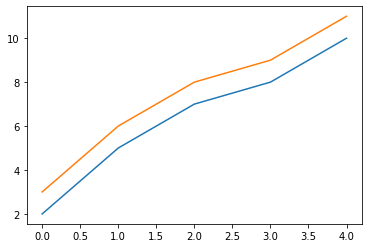

In [5]:
# 1. plot方法绘制
x = range(0,5)
y1 = [2,5,7,8,10]
y2= [3,6,8,9,11]

fig,ax= plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
print(ax.lines); # 通过直接使用辅助方法画线，打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象


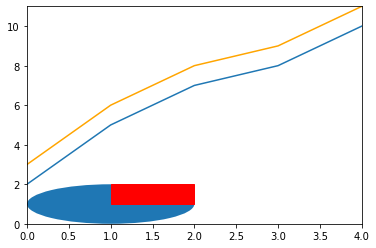

In [6]:
# 2. Line2D对象绘制

x = range(0,5)
y1 = [2,5,7,8,10]
y2= [3,6,8,9,11]
fig,ax= plt.subplots()
# lines = [Line2D(x, y1), Line2D(x, y2,color='orange')]  # 显式创建Line2D对象

ax.add_line(Line2D(x, y1)) # 使用add_line方法将创建的Line2D添加到子图中
ax.add_line(Line2D(x, y2,color='orange'))
ax.add_patch(Circle((1,1), 1))
ax.add_patch(Rectangle((1,1), 1, 1, color='red'))

ax.set_xlim(0,4)
ax.set_ylim(0, 11);


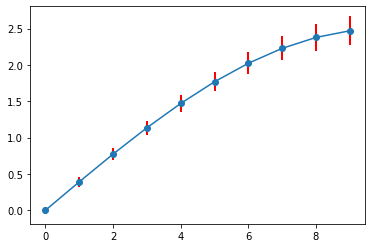

In [7]:
# 折线误差
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x,y,yerr=yerr,fmt='o-',ecolor='r',elinewidth=2);



In [8]:
np.linspace(0.05, 0.2, 10)

array([0.05      , 0.06666667, 0.08333333, 0.1       , 0.11666667,
       0.13333333, 0.15      , 0.16666667, 0.18333333, 0.2       ])

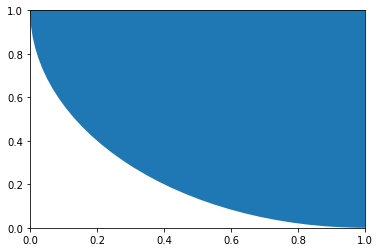

In [9]:
fig,ax= plt.subplots()
# lines = [Line2D(x, y1), Line2D(x, y2,color='orange')]  # 显式创建Line2D对象

ax.add_patch(Circle((1,1), 1))

plt.show()

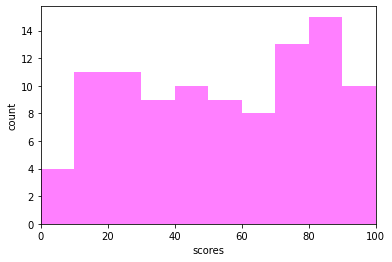

In [10]:
# hist-直方图
x=np.random.randint(0,100,100) #生成[0-100)之间的100个数据,即 数据集 
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100); #设置x轴分布范围 plt.show()

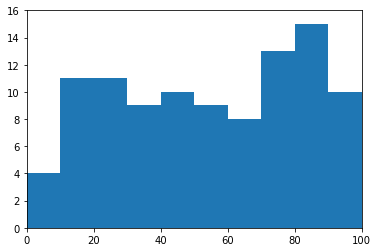

In [11]:
# Rectangle矩形类绘制直方图
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False,include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

#用Rectangle把hist绘制出来

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
    ax1.add_patch(rect)

ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16);

In [12]:
print(df.head())
print(df_cnt.head())

   data     fenzu
0    34  [30, 40)
1    81  [80, 90)
2    86  [80, 90)
3    49  [40, 50)
4    61  [60, 70)
      index  fenzu  mini  maxi  width
0   [0, 10)      4     0    10     10
1  [10, 20)     11    10    20     10
2  [20, 30)     11    20    30     10
3  [30, 40)      9    30    40     10
4  [40, 50)     10    40    50     10


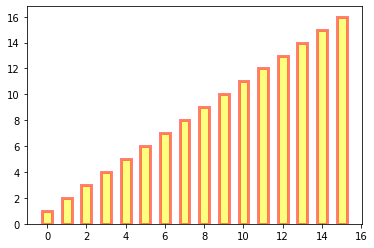

In [13]:
# bar绘制柱状图
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3);

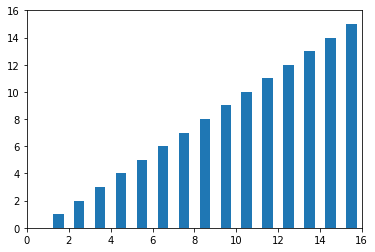

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect = plt.Rectangle((i+0.25,0),0.5,i) # 初始位置， 宽度（偏移）， 高度
    ax1.add_patch(rect)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16);

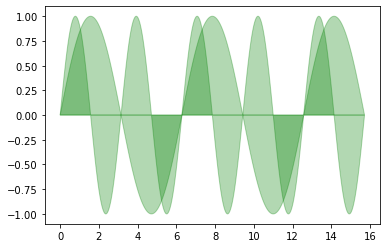

In [15]:
# 用fill来绘制图形
x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color = "g", alpha = 0.3);
plt.fill(x, y2, color = "g", alpha = 0.3);

In [16]:
np.linspace(0, 5 * np.pi, 6) 

array([ 0.        ,  3.14159265,  6.28318531,  9.42477796, 12.56637061,
       15.70796327])

In [17]:
 5 * np.pi

15.707963267948966

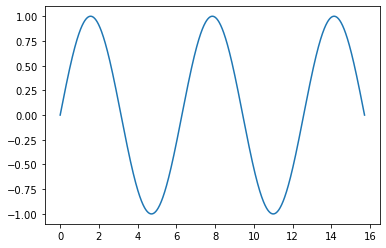

In [18]:
plt.plot(x, y1)

(-5.0, 5.0)

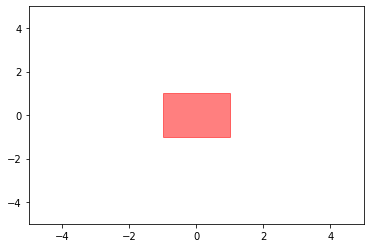

In [19]:
fig, ax = plt.subplots()
ax.add_patch(Polygon(np.array(((1, 1), (1, -1),(-1, -1),(-1, 1))), color='red', alpha=0.5))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

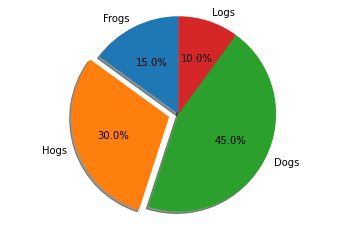

In [20]:
# pie绘制饼状图
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle. 

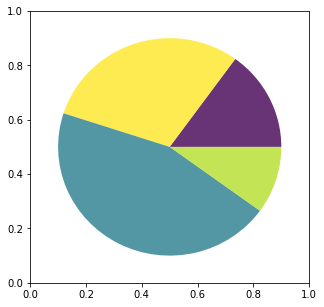

In [21]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.5, 0.5), .4, 0, 54),           
    Wedge((0.5, 0.5), .4, 54, 162),  
    Wedge((0.5, 0.5), .4, 162, 324),           
    Wedge((0.5, 0.5), .4, 324, 360),  
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(colors)
ax1.add_collection(p);

In [22]:
colors

array([20.02444532, 50.58219384, 32.84100316, 47.16432457])

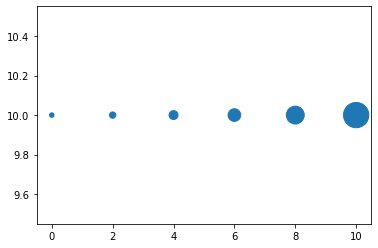

In [23]:
# 用scatter绘制散点图
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 
plt.scatter(x,y,s=s) ;

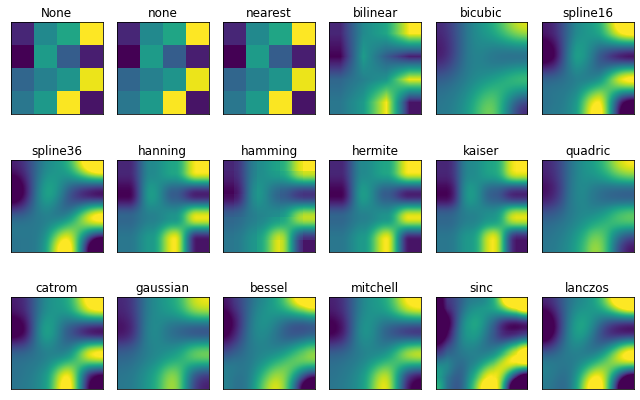

In [24]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

In [25]:
zip(axs.flat, methods)
# zip() 函数⽤于将可迭代的对象作为参数，将对象中对应的元素打包成⼀个个元组，然后返回由这些元组组成的对象，这样做的好处是节约了不少的内存。

### Figure容器

AxesSubplot(0.125,0.536818;0.775x0.343182)


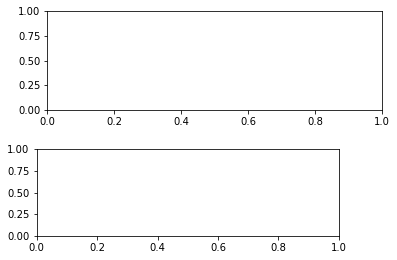

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 

In [27]:
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的

[<AxesSubplot:>, <Axes:>]


In [28]:
print(ax2)

Axes(0.1,0.1;0.7x0.3)


AxesSubplot(0.125,0.125;0.775x0.755)


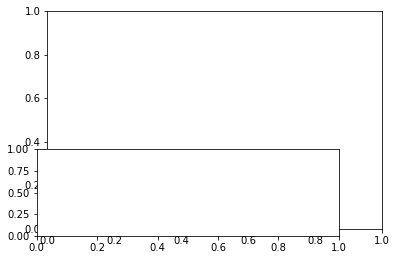

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 

AxesSubplot(0.125,0.391471;0.775x0.222059)


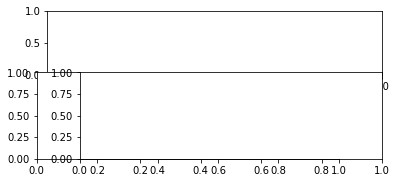

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(312) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
ax3 = fig.add_axes([0.2, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 

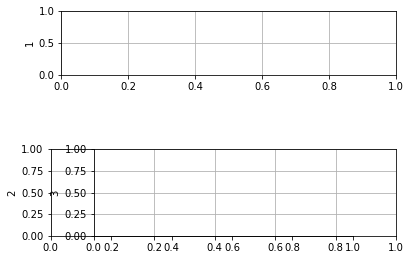

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(311) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
ax3 = fig.add_axes([0.2, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
count = 1
for ax in fig.axes:
    ax.set_ylabel(count)
    ax.grid(True)
    count += 1

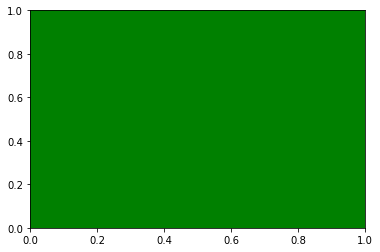

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

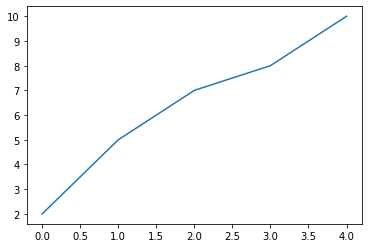

In [33]:
# 不用print，直接显示结果
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔
plt.show()

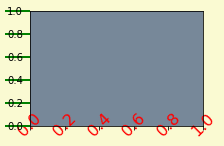

In [92]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小
    label.set_position((1,0.2))

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_markeredgecolor('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

In [35]:
np.random.rand(20)

array([0.40949   , 0.53316116, 0.59924926, 0.69490319, 0.77750914,
       0.00293679, 0.40903808, 0.38279645, 0.00789108, 0.6640254 ,
       0.76299205, 0.99832788, 0.51204324, 0.13658334, 0.74528993,
       0.3286812 , 0.63116298, 0.26172195, 0.07658567, 0.78662858])

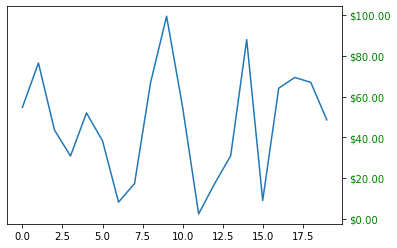

In [36]:
fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green')
                         # ,labelleft=False, labelright=True);
ax.yaxis.tick_right()

## 思考题

- primitives 和 container的区别和联系是什么，分别用于控制可视化图表中的哪些要素



答：container 包含容纳 primitives，primitives用于可视化，container相当于规定如何安排primitives。

自顶向下的顺序：Figure，Axes，Axis，Tick。为包含关系，层层深入

Figure：整个大图最外层的矩形框

Axes：控制坐标系，即所有的绘图元素都在它的内部

Axis：控制坐标轴。刻度线，网格线，标签等

Tick：控制刻度的显示格式，主次坐标轴等


- 使用提供的drug数据集，对第一列yyyy和第二列state分组求和，画出下面折线图。PA加粗标黄，其他为灰色。    
图标题和横纵坐标轴标题，以及线的文本暂不做要求。  
  

![](https://img-blog.csdnimg.cn/20210523162430365.png)




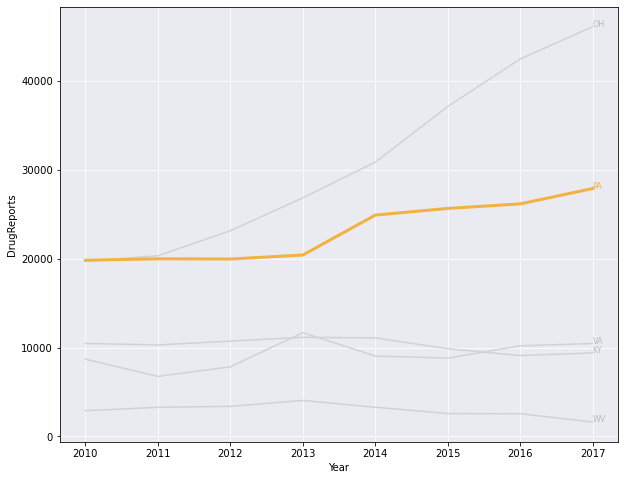

In [126]:
drug_data = pd.read_csv('./data/Drugs.csv')
# drug_data.head()
x = drug_data.groupby('YYYY').count().index
new_drug_data = drug_data.groupby(['State', 'YYYY']).sum()

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot() # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
ax.patch.set_facecolor('#eaeaf1')

for state in drug_data.groupby('State').count().index:
    if state == 'PA':
        ax.plot(x, new_drug_data.loc[[state],'DrugReports'], label=state, color='#f1b240', linewidth=3)
        ax.text(x.values[-1], new_drug_data.loc[[state],'DrugReports'].values[-1], state, color='#f1b240', fontsize=8)
    else:
        ax.plot(x, new_drug_data.loc[[state],'DrugReports'], label=state, color='#d1d1d6')
        ax.text(x.values[-1], new_drug_data.loc[[state],'DrugReports'].values[-1], state, color='#bbbbbf', fontsize=8)

ax.set_ylabel('DrugReports')
ax.set_xlabel('Year')
ax.grid(True, color='white')
plt.show()

- 分别用一组长方形柱和填充面积的方式模仿画出下图，函数 y = -1 * (x - 2) * (x - 8) +10 在区间[2,9]的积分面积  
![](https://img-blog.csdnimg.cn/20201126105910781.png)  
![](https://img-blog.csdnimg.cn/20201126105910780.png)  


(0.0, 20.0)

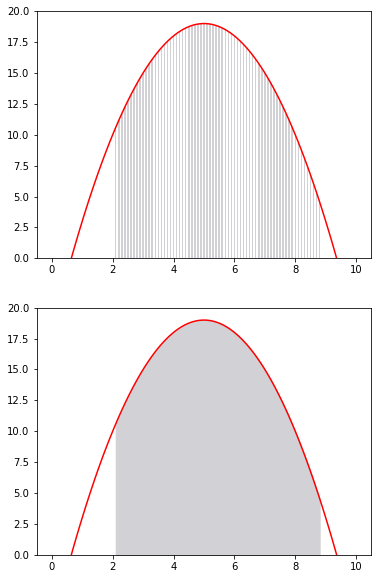

In [174]:
x = np.linspace(0, 10, 100)
y = -1 * (x - 2) * (x - 8) +10
x2 = np.arange(2.1, 8.9, 0.1)
y2 = -1 * (x2 - 2) * (x2 - 8) +10

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot(211)
ax.plot(x, y, color='r')
ax.bar(x2, y2, width=0.05, color='#d1d1d6',)
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(0, 20)

ax1 = fig.add_subplot(212)
ax1.plot(x, y, color='r')
ax1.fill_between(x2, y2, color='#d1d1d6' )
ax1.set_xlim(-0.5, 10.5)
ax1.set_ylim(0, 20)


## 参考资料
[1. matplotlib设计的基本逻辑](https://zhuanlan.zhihu.com/p/32693665)  
[2. AI算法工程师手册](https://www.bookstack.cn/read/huaxiaozhuan-ai/spilt.2.333f5abdbabf383d.md)  